# 数据来源
https://www.kaggle.com/imdevskp/ebola-outbreak-20142016-complete-dataset

In [8]:
import warnings  
warnings.filterwarnings("ignore") 

In [9]:
import numpy as np 
import pandas as pd 
import plotly as py
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [10]:
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

In [11]:
#loading the dataset
df = pd.read_csv('data/ebola/ebola_2014_2016_clean.csv')
df_cp = df.copy()
df_cp.head(5)

Country        Date  \
0        Guinea  2014-08-29   
1       Nigeria  2014-08-29   
2  Sierra Leone  2014-08-29   
3       Liberia  2014-08-29   
4  Sierra Leone  2014-09-05   

   Cumulative no. of confirmed, probable and suspected cases  \
0                                              648.0           
1                                               19.0           
2                                             1026.0           
3                                             1378.0           
4                                             1261.0           

   Cumulative no. of confirmed, probable and suspected deaths  
0                                              430.0           
1                                                7.0           
2                                              422.0           
3                                              694.0           
4                                              491.0

In [12]:
df_cp = df_cp.rename(columns={'Cumulative no. of confirmed, probable and suspected cases':'Confirmed',
                             'Cumulative no. of confirmed, probable and suspected deaths':'Deaths'})
df_cp.head()

Country        Date  Confirmed  Deaths
0        Guinea  2014-08-29      648.0   430.0
1       Nigeria  2014-08-29       19.0     7.0
2  Sierra Leone  2014-08-29     1026.0   422.0
3       Liberia  2014-08-29     1378.0   694.0
4  Sierra Leone  2014-09-05     1261.0   491.0

In [13]:
df_countries = df_cp.groupby(["Country","Date"]).sum().reset_index().sort_values("Date",ascending=False)
df_countries.head()

Country        Date  Confirmed  Deaths
2378  United States of America  2016-03-23        4.0     1.0
399                      Italy  2016-03-23        1.0     0.0
901                       Mali  2016-03-23        8.0     6.0
258                     Guinea  2016-03-23     3804.0  2536.0
658                    Liberia  2016-03-23    10680.0  4813.0

In [14]:
df_countries = df_countries.drop_duplicates(subset = ['Country'])
df_countries

Country        Date  Confirmed  Deaths
2378  United States of America  2016-03-23        4.0     1.0
399                      Italy  2016-03-23        1.0     0.0
901                       Mali  2016-03-23        8.0     6.0
258                     Guinea  2016-03-23     3804.0  2536.0
658                    Liberia  2016-03-23    10680.0  4813.0
1669              Sierra Leone  2016-03-23    14122.0  3955.0
2133            United Kingdom  2016-03-23        1.0     0.0
1912                     Spain  2016-03-23        1.0     0.0
1410                   Senegal  2016-03-23        1.0     0.0
1156                   Nigeria  2016-03-23       20.0     8.0

In [15]:
fig = go.Figure(data=go.Choropleth(
    locations = df_countries['Country'],
    locationmode = 'country names',
    z = df_countries['Confirmed'],
    colorscale = 'Reds',
    marker_line_color = 'black',
    marker_line_width = 0.5,
))
fig.update_layout(
    title_text = '截至2016年3月23的确诊病例',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    )
)

In [27]:
# 传播可视化
df_countrydate = df_cp[df_cp['Confirmed']>0]
df_countrydate = df_countrydate.groupby(['Date','Country']).sum().reset_index()
df_countrydate
# 创建可视化视图
fig = px.choropleth(df_countrydate, 
                    locations="Country", 
                    locationmode = "country names",
                    color="Confirmed", 
                    hover_name="Country", 
                    animation_frame="Date"
                   )
fig.update_layout(
    title_text = '全球扩散过程',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))
    
fig.show()

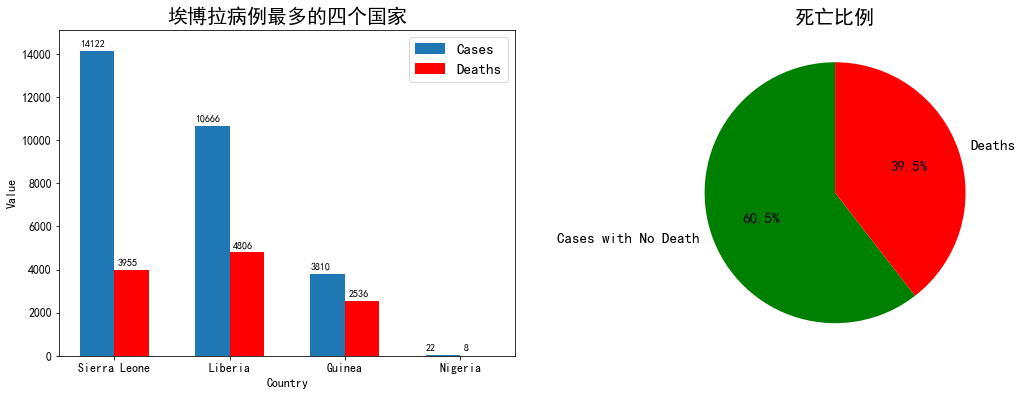

In [21]:
#埃博拉病例最多的四个国家
dftemp = df.sort_values(by="Cumulative no. of confirmed, probable and suspected cases", ascending=False)
countries = dftemp["Country"].unique()[0:4]
cases = []
for c in countries:
    cases.append(np.sort(df.loc[df['Country'] == c]["Cumulative no. of confirmed, probable and suspected cases"].unique())[-1])
f , ax  = plt.subplots(1,2,figsize=(18,6))
ax[0].bar(np.arange(0,4),cases,width=0.3, label = 'Cases')
ax[0].set_title('埃博拉病例最多的四个国家',fontsize=20, fontweight='bold')
ax[0].set_xlabel('Country',fontsize=12)
ax[0].set_ylabel('Value',fontsize=12)
counter = 0
for i in cases:
    ax[0].text(counter-0.15, i+200, int(i), color='black', fontsize=10, fontweight='bold')
    counter +=1 
ax[0].set_ylim([0,cases[0]+1000])
#top 4 countries in deathality from ebola
dftemp = df.sort_values(by = "Cumulative no. of confirmed, probable and suspected deaths", ascending = False)
countriesD = dftemp['Country'].unique()[0:4]
deaths = []
for c in countries:
    deaths.append(np.sort(df.loc[dftemp['Country'] == c]["Cumulative no. of confirmed, probable and suspected deaths"].unique())[-1])
deaths
ax[0].bar(np.arange(0,4)+0.3, deaths, width = 0.3, color = 'red', label = 'Deaths')
ax[0].set_xticks(np.arange(0,4)+0.3/2)
ax[0].set_xticklabels(countries)
ax[0].tick_params(axis='both',labelsize=12)
counter = 0
for i in deaths:
    ax[0].text(counter-0.12+0.3, i+200, int(i), color='black', fontsize=10, fontweight='bold')
    counter +=1 
ax[0].legend(fontsize=15)
totalCases = 0
totalDeaths = 0
for i in np.arange(0,4):
    totalCases += cases[i]
    totalDeaths += deaths[i]
ax[1].pie([totalCases-totalDeaths,totalDeaths],radius = 1,labels=['Cases with No Death','Deaths'],startangle=90,colors = ['green','red'], textprops={'fontsize': 15},autopct='%1.1f%%')
ax[1].set_title('死亡比例',fontsize=20,fontweight='bold')
plt.show()

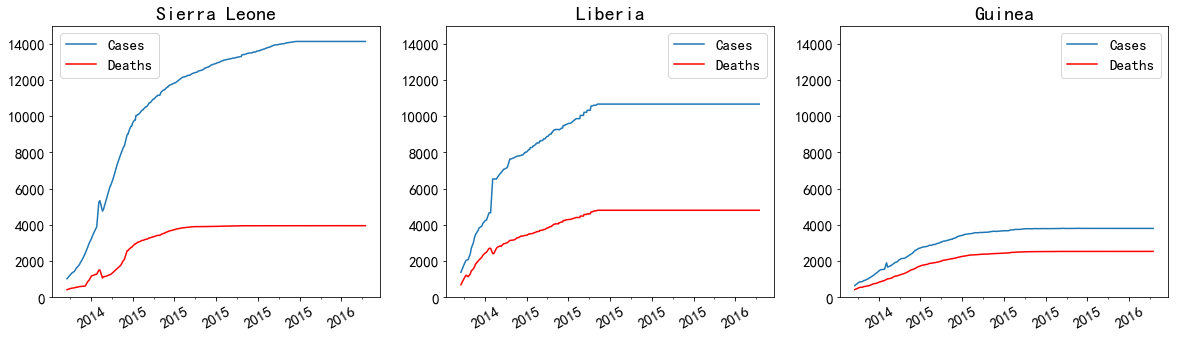

In [24]:
f, ax = plt.subplots(1,3,figsize=(20,5))
temp = df.loc[df['Country'] == 'Sierra Leone']['Date'].tolist()
casesSierra = df.loc[df['Country'] == 'Sierra Leone'].sort_values(by='Date')['Cumulative no. of confirmed, probable and suspected cases'].tolist()
DeathsSierra = df.loc[df['Country'] == 'Sierra Leone'].sort_values(by='Date')['Cumulative no. of confirmed, probable and suspected deaths'].tolist()
timeSierra = []

for i in temp:
    timeSierra.append(datetime.strptime(i,'%Y-%m-%d'))
ax[0].plot(timeSierra, casesSierra,label='Cases')
ax[0].plot(timeSierra, DeathsSierra,color='red',label='Deaths')
ax[0].set_title('Sierra Leone',fontsize=20,fontweight='bold')
ax[0].tick_params(axis='both', labelsize=15)
ax[0].tick_params(axis='x',rotation=30)
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(8))
ax[0].xaxis.set_minor_locator(ticker.MaxNLocator(16))
ax[0].legend(fontsize='15')
ax[0].set_ylim([0,15000])

#plotting Liberia
temp = df.loc[df['Country'] == 'Liberia']['Date'].tolist()
casesLiberia = df.loc[df['Country'] == 'Liberia'].sort_values(by='Date')['Cumulative no. of confirmed, probable and suspected cases'].tolist()
DeathsLiberia = df.loc[df['Country'] == 'Liberia'].sort_values(by='Date')['Cumulative no. of confirmed, probable and suspected deaths'].tolist()
timeLiberia = []
for i in temp:
    timeLiberia.append(datetime.strptime(i,'%Y-%m-%d'))
    
#filtering the data
min = casesLiberia[0]
for i in range(1,len(casesLiberia)):
    if (casesLiberia[i] < min):
        casesLiberia[i] = -1
        DeathsLiberia[i] = -1
        timeLiberia[i] = ''
    else:
        min = casesLiberia[1]
casesLiberia = list(filter(lambda a: a!=-1, casesLiberia))
DeathsLiberia = list(filter(lambda a: a!=-1, DeathsLiberia))
timeLiberia = list(filter(lambda a: a!='', timeLiberia))

ax[1].plot(timeLiberia, casesLiberia,label='Cases')
ax[1].plot(timeLiberia, DeathsLiberia,color='red',label='Deaths')
ax[1].set_title('Liberia',fontsize=20,fontweight='bold')
ax[1].tick_params(axis='both', labelsize=15)
ax[1].tick_params(axis='x',rotation=30)
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(8))
ax[1].xaxis.set_minor_locator(ticker.MaxNLocator(16))
ax[1].legend(fontsize='15')
ax[1].set_ylim([0,15000])

#plotting Guinea

temp = df.loc[df['Country'] == 'Guinea']['Date'].tolist()
casesGuinea = df.loc[df['Country'] == 'Guinea'].sort_values(by='Date')['Cumulative no. of confirmed, probable and suspected cases'].tolist()
DeathsGuinea = df.loc[df['Country'] == 'Guinea'].sort_values(by='Date')['Cumulative no. of confirmed, probable and suspected deaths'].tolist()
timeGuinea = []
for i in temp:
    timeGuinea.append(datetime.strptime(i,'%Y-%m-%d'))

ax[2].plot(timeGuinea, casesGuinea,label='Cases')
ax[2].plot(timeGuinea, DeathsGuinea,color='red',label='Deaths')
ax[2].set_title('Guinea',fontsize=20,fontweight='bold')
ax[2].tick_params(axis='both', labelsize=15)
ax[2].tick_params(axis='x',rotation=30)
ax[2].xaxis.set_major_locator(ticker.MaxNLocator(8))
ax[2].xaxis.set_minor_locator(ticker.MaxNLocator(16))
ax[2].legend(fontsize='15')
ax[2].set_ylim([0,15000])
f.show()